<a href="https://colab.research.google.com/github/heegeunyoon/python101/blob/main/1_3_pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas 시작- 파일을 DataFrame 로딩, 기본 API

In [ ]:
![ ! -d python101 ] && git clone https://github.com/heegeunyoon/python101.git

Cloning into 'python101'...
remote: Enumerating objects: 1303, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 1303 (delta 236), reused 186 (delta 186), pack-reused 1033 (from 3)
Receiving objects: 100% (1303/1303), 123.99 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (684/684), done.


In [136]:
import pandas as pd

In [137]:
#df = pd.read_csv('/content/python101/input/SP500HistoricalData.csv')
df = pd.read_csv('/content/python101/input/SP500HistoricalData1.csv')

In [138]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/11/2024,"5,375.32","5,353.00","5,375.95","5,327.25",NaN,0.27%
1,06/10/2024,"5,360.79","5,341.22","5,365.79","5,331.52",NaN,0.26%
2,06/07/2024,"5,346.99","5,343.81","5,375.08","5,331.33",NaN,-0.11%
3,06/06/2024,"5,352.96","5,357.80","5,362.35","5,335.36",NaN,-0.02%
4,06/05/2024,"5,354.03","5,314.48","5,354.16","5,297.64",NaN,1.18%
...,...,...,...,...,...,...,...
1365,01/08/2019,"2,574.40","2,568.10","2,579.80","2,547.60",NaN,0.97%
1366,01/07/2019,"2,549.70","2,535.60","2,566.20","2,524.60",NaN,0.70%
1367,01/04/2019,"2,531.90","2,474.30","2,538.10","2,474.30",NaN,3.43%
1368,01/03/2019,"2,447.90","2,491.90","2,493.10","2,444.00",NaN,-2.47%


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1370 non-null   object 
 1   Price     1370 non-null   object 
 2   Open      1370 non-null   object 
 3   High      1370 non-null   object 
 4   Low       1370 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  1370 non-null   object 
dtypes: float64(1), object(6)
memory usage: 75.1+ KB


In [140]:
df.describe()

,Vol.
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1370 non-null   object 
 1   Price     1370 non-null   object 
 2   Open      1370 non-null   object 
 3   High      1370 non-null   object 
 4   Low       1370 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  1370 non-null   object 
dtypes: float64(1), object(6)
memory usage: 75.1+ KB


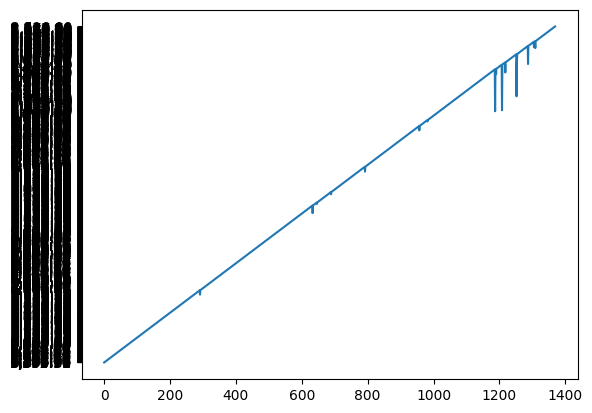

In [142]:
import matplotlib.pyplot as plt
plt.plot(df.Price)
plt.show()

In [143]:
df.dtypes

,0
Date,object
Price,object
Open,object
High,object
Low,object
Vol.,float64
Change %,object


In [144]:
df.astype({'Price': 'float'})
# df.astype({'Date': 'str', 'Price': 'float', 'Open': 'float', 'High': 'float', 'Low': 'float'})

ValueError: could not convert string to float: '5,375.32': Error while type casting for column 'Price'

In [146]:
def remove_comma_float(x):
    return float(x.replace(',', ''))

In [147]:
df['Price'].apply(remove_comma_float)

,Price
0,5375.32
1,5360.79
2,5346.99
3,5352.96
4,5354.03
...,...
1365,2574.40
1366,2549.70
1367,2531.90
1368,2447.90


In [148]:
df['Price'] = df['Price'].apply(remove_comma_float)

In [149]:
df['Open'] = df['Open'].apply(remove_comma_float)

In [150]:
df['High'] = df['High'].apply(remove_comma_float)
df['Low'] = df['Low'].apply(remove_comma_float)

In [151]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/11/2024,5375.32,5353.00,5375.95,5327.25,NaN,0.27%
1,06/10/2024,5360.79,5341.22,5365.79,5331.52,NaN,0.26%
2,06/07/2024,5346.99,5343.81,5375.08,5331.33,NaN,-0.11%
3,06/06/2024,5352.96,5357.80,5362.35,5335.36,NaN,-0.02%
4,06/05/2024,5354.03,5314.48,5354.16,5297.64,NaN,1.18%
...,...,...,...,...,...,...,...
1365,01/08/2019,2574.40,2568.10,2579.80,2547.60,NaN,0.97%
1366,01/07/2019,2549.70,2535.60,2566.20,2524.60,NaN,0.70%
1367,01/04/2019,2531.90,2474.30,2538.10,2474.30,NaN,3.43%
1368,01/03/2019,2447.90,2491.90,2493.10,2444.00,NaN,-2.47%


In [153]:
df.describe()

,Price,Open,High,Low,Vol.
count,1370.000000,1370.000000,1370.000000,1370.000000,0.0
mean,3864.527314,3863.484080,3886.063920,3839.640102,NaN
std,710.204626,710.124624,711.202345,709.097308,NaN
min,2237.400000,2290.700000,2300.700000,2191.900000,NaN
25%,3215.600000,3213.850000,3226.625000,3196.650000,NaN
50%,3967.875000,3964.045000,3992.620000,3935.905000,NaN
75%,4400.525000,4402.900000,4422.515000,4381.305000,NaN
max,5375.320000,5357.800000,5375.950000,5335.360000,NaN


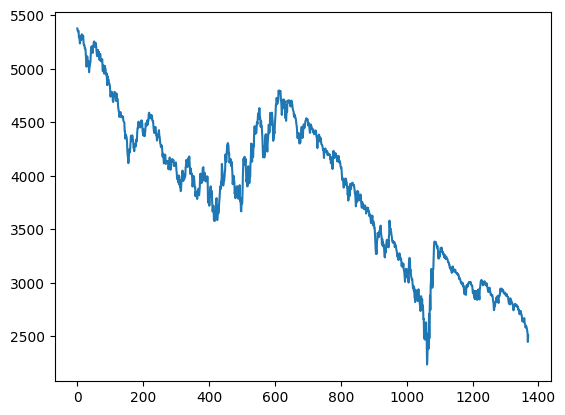

In [154]:
plt.plot(df['Price'])
plt.show()

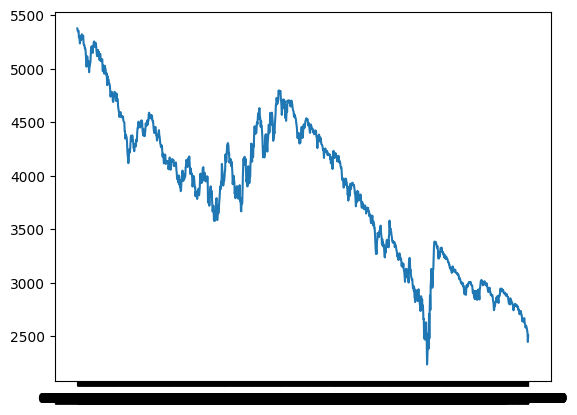

In [155]:
plt.plot(df['Date'], df['Price'])
plt.show()

In [158]:
df['Date']

,Date
0,2024-06-11
1,2024-06-10
2,2024-06-07
3,2024-06-06
4,2024-06-05
...,...
1365,2019-01-08
1366,2019-01-07
1367,2019-01-04
1368,2019-01-03


In [159]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Date']

/tmp/ipython-input-159-657059867.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


,Date
0,2024-06-11
1,2024-06-10
2,2024-06-07
3,2024-06-06
4,2024-06-05
...,...
1365,2019-01-08
1366,2019-01-07
1367,2019-01-04
1368,2019-01-03


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1370 non-null   datetime64[ns]
 1   Price     1370 non-null   float64       
 2   Open      1370 non-null   float64       
 3   High      1370 non-null   float64       
 4   Low       1370 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  1370 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 75.1+ KB


In [162]:
df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1370 entries, 2024-06-11 to 2019-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1370 non-null   float64
 1   Open      1370 non-null   float64
 2   High      1370 non-null   float64
 3   Low       1370 non-null   float64
 4   Vol.      0 non-null      float64
 5   Change %  1370 non-null   object 
dtypes: float64(5), object(1)
memory usage: 74.9+ KB


In [165]:
df.sort_index(inplace=True)

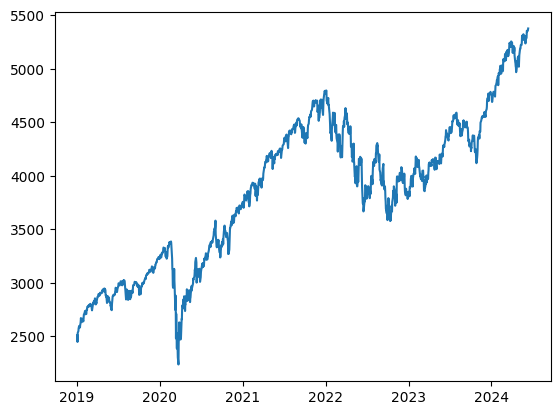

In [166]:
plt.plot(df['Price'])
plt.show()

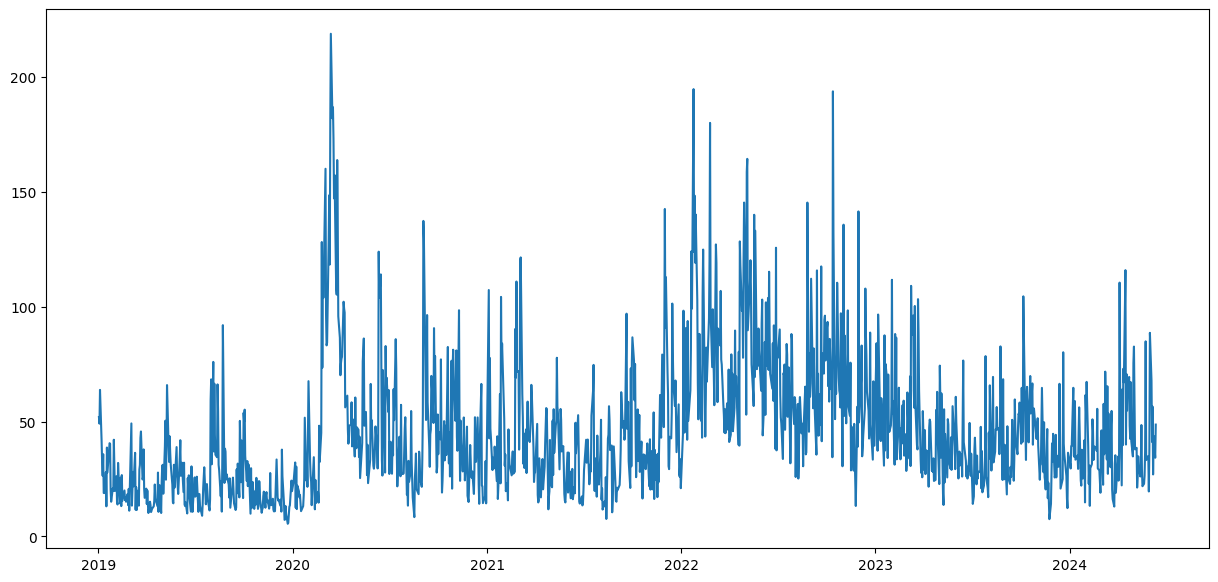

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.plot(df['High'] - df['Low'])
plt.show()

In [ ]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-02,2510.00,2477.00,2519.50,2467.50,NaN,0.13%
2019-01-03,2447.90,2491.90,2493.10,2444.00,NaN,-2.47%
2019-01-04,2531.90,2474.30,2538.10,2474.30,NaN,3.43%
2019-01-07,2549.70,2535.60,2566.20,2524.60,NaN,0.70%
2019-01-08,2574.40,2568.10,2579.80,2547.60,NaN,0.97%
...,...,...,...,...,...,...
2024-06-05,5354.03,5314.48,5354.16,5297.64,NaN,1.18%
2024-06-06,5352.96,5357.80,5362.35,5335.36,NaN,-0.02%
2024-06-07,5346.99,5343.81,5375.08,5331.33,NaN,-0.11%


In [ ]:
df.sort_index(inplace=True)

In [211]:
df1 = df.resample('ME').first()
df2 = df.resample('ME').last()
df3 = df.resample('ME').sum()
df4 = df.drop(columns=['Change %']).resample('ME').mean()
df5 = df.drop(columns=['Change %']).resample('ME').prod()

In [212]:
pd.concat([df1, df2, df3, df4, df5], axis=1)

,Price,Open,High,Low,Vol.,Change %,Price,Open,High,Low,...,Price,Open,High,Low,Vol.,Price,Open,High,Low,Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,2510.00,2477.00,2519.50,2467.50,NaN,0.13%,2704.10,2685.50,2708.90,2678.70,...,2607.390476,2597.900000,2617.180952,2585.009524,NaN,5.469043e+71,5.064918e+71,5.921889e+71,4.560261e+71,1.0
2019-02-28,2706.50,2702.30,2716.70,2696.90,NaN,0.09%,2784.50,2788.10,2793.70,2782.50,...,2754.868421,2750.142105,2761.421053,2742.452632,NaN,2.297938e+65,2.223867e+65,2.403944e+65,2.108264e+65,1.0
2019-03-31,2803.70,2798.20,2808.00,2787.40,NaN,0.69%,2834.40,2828.30,2836.00,2819.20,...,2803.985714,2803.595238,2815.757143,2789.852381,NaN,2.528561e+72,2.521008e+72,2.760897e+72,2.273918e+72,1.0
2019-04-30,2867.20,2848.60,2869.40,2848.60,NaN,1.16%,2945.80,2937.10,2948.20,2924.10,...,2903.795238,2900.814286,2908.752381,2892.642857,NaN,5.271980e+72,5.159465e+72,5.464264e+72,4.862989e+72,1.0
2019-05-31,2923.70,2952.30,2954.10,2923.40,NaN,-0.75%,2752.10,2766.20,2769.00,2750.50,...,2854.709091,2855.345455,2870.236364,2838.754545,NaN,1.049407e+76,1.054944e+76,1.182608e+76,9.279622e+75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,4906.19,4861.11,4906.97,4853.52,NaN,1.25%,5096.27,5085.36,5104.99,5061.89,...,5011.961500,5003.732000,5023.214000,4986.563000,NaN,9.991854e+73,9.665870e+73,1.044932e+74,9.023347e+73,1.0
2024-03-31,5137.08,5098.51,5140.33,5094.16,NaN,0.80%,5254.35,5248.03,5264.85,5245.82,...,5170.572500,5167.863000,5187.621000,5149.981500,NaN,1.863560e+74,1.844194e+74,1.990716e+74,1.720356e+74,1.0
2024-04-30,5243.77,5257.97,5263.95,5229.20,NaN,-0.20%,5035.69,5103.78,5110.83,5035.31,...,5112.492727,5124.729091,5145.566818,5088.249545,NaN,3.879126e+81,4.088864e+81,4.472102e+81,3.494141e+81,1.0


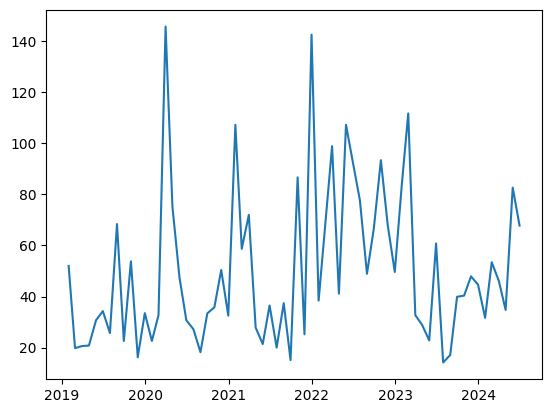

In [213]:
plt.plot(df1.High - df1.Low)
plt.show()

In [217]:
df2 = df1.loc['2021/1/1':]

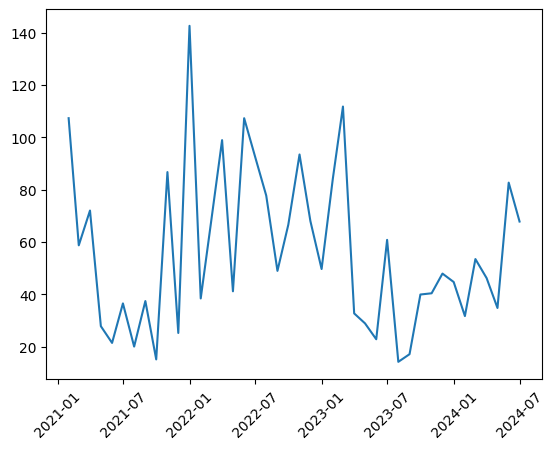

In [218]:
plt.plot(df2.High - df2.Low)
plt.xticks(rotation=45)
plt.show()

In [219]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-02,2510.00,2477.00,2519.50,2467.50,NaN,0.13%
2019-01-03,2447.90,2491.90,2493.10,2444.00,NaN,-2.47%
2019-01-04,2531.90,2474.30,2538.10,2474.30,NaN,3.43%
2019-01-07,2549.70,2535.60,2566.20,2524.60,NaN,0.70%
2019-01-08,2574.40,2568.10,2579.80,2547.60,NaN,0.97%
...,...,...,...,...,...,...
2024-06-05,5354.03,5314.48,5354.16,5297.64,NaN,1.18%
2024-06-06,5352.96,5357.80,5362.35,5335.36,NaN,-0.02%
2024-06-07,5346.99,5343.81,5375.08,5331.33,NaN,-0.11%


In [220]:
df['price_ret'] = df['Price'].pct_change(periods=1)

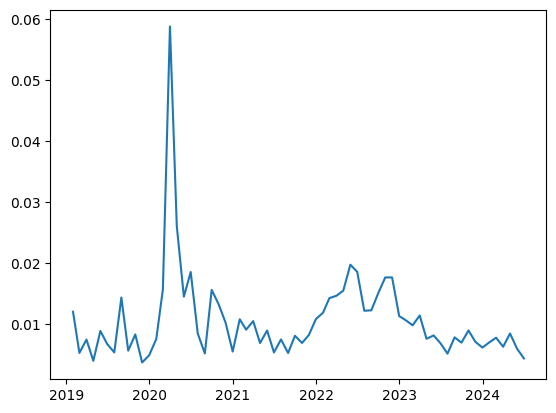

In [223]:
plt.plot(df['price_ret'].resample('ME').std())
plt.show()

### USD - KRW

In [ ]:
df = pd.read_csv('/content/python101/input/USD_KRW Historical Data.csv')
df.info()

EmptyDataError: No columns to parse from file

In [ ]:
def str2num(x):
  return float(x.replace(',', ''))

df = pd.read_csv('USD_KRW Historical Data.csv',
                 converters={'Price': str2num, 'Open': str2num,
                             'Open': str2num, 'High': str2num,
                             'Low': str2num},
                 parse_dates=['Date'])

df.set_index('Date', inplace=True)

In [ ]:
df['Price_mv_30'] = df['Price'].rolling(window=30).mean()
df['Price_mv_180'] = df['Price'].rolling(window=180).mean()

len(df[df['Price_mv_30'] - df['Price_mv_180'] >= 0])

In [ ]:
plt.plot(df['Price'])
plt.show()

In [ ]:
df

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, '')
locale.atof('123,456.789')

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df['Price_mv_5'] = df['Price'].rolling(window=5).mean()
df['Price_mv_10'] = df['Price'].rolling(window=10).mean()
df['Price_mv_20'] = df['Price'].rolling(window=20).mean()
df['Price_mv_30'] = df['Price'].rolling(window=30).mean()
df['Price_mv_60'] = df['Price'].rolling(window=60).mean()
df['Price_mv_180'] = df['Price'].rolling(window=180).mean()

In [ ]:
df.dropna(axis=0)
df.dropna(axis=1)

In [ ]:
from datetime import datetime

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(df['Price'], label='price')
ax.plot(df['Price_mv_5'], label='price mv_5')
ax.plot(df['Price_mv_10'], label='price mv_10')
ax.plot(df['Price_mv_20'], label='price mv_20')
ax.plot(df['Price_mv_30'], label='price mv_30')
ax.plot(df['Price_mv_60'], label='price mv_60')
ax.plot(df['Price_mv_180'], label='price mv_180')
plt.xlim([datetime(2020,1,1), datetime(2020,3,30)])
plt.legend()
plt.show()


In [ ]:
df.drop('Vol.', inplace=True, axis=1)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df

In [ ]:
sum(df['Price_mv_30'] - df['Price_mv_180'] > 0)

In [ ]:
sum(df['Price_mv_30'] - df['Price_mv_180'] > 0)

In [ ]:
cnt = 0

for index, row in df.iterrows():
    if row.Price_mv_30 > row.Price_mv_180:
        cnt += 1


for i in range(len(df)):
    if df.iloc[i]

In [ ]:
print(cnt)

In [ ]:
df['price_ret'] = df['Price'].pct_change(periods=1)

In [ ]:
plt.plot(df['price_ret'].rolling(10).std().dropna())
plt.xlabel('date')
plt.ylabel('volatility')
plt.title('volatility timeseries', fontsize=16)
plt.xticks(rotation=45)
plt.xlim([datetime(2020,1,1), datetime(2020,12,31)])
plt.show()

In [ ]:
df[['Price']].rolling(5).std()

In [ ]:
from datetime import datetime

In [ ]:
df.loc[df.index >= datetime(2023,1,1)]

In [ ]:
df['2020-01-01':'2022-01-01']

In [ ]:
df['Date'].iloc[0]

In [ ]:
print(df.shape)

In [ ]:
print(df.info())

In [ ]:
df.head(5)

In [ ]:
pd.DataFrame([1, 2, 3])

In [ ]:
titanic_df = pd.read_csv('/content/python101/input/titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
print(titanic_df)


In [ ]:
titanic_df.head()

In [ ]:
print('DataFrame 크기: ', titanic_df.shape)

In [ ]:
titanic_df.info()

In [ ]:
titanic_df.describe()

In [ ]:
titanic_df['Pclass']

In [ ]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

In [ ]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

In [ ]:
titanic_pclass.head()

In [ ]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

In [ ]:
print(titanic_df.shape)
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('titanic_df 컬럼 수:', titanic_df.shape[1])

In [ ]:
print(titanic_df['Embarked'].value_counts())

In [ ]:
print(titanic_df['Embarked'].value_counts(dropna=False))

In [ ]:
titanic_df.info()

In [ ]:
print('titanic_df 데이터 건수:', titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')
# value_counts()는 디폴트로 dropna=True이므로 value_counts(dropna=True)와 동일.
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

### DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

* 넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기

In [ ]:
import numpy as np

In [ ]:
col_name1=['col1']

In [ ]:
list1 = [1, 2, 3]
array1 = np.array(list1)

In [ ]:
print('array1 shape:', array1.shape )

In [ ]:
# 리스트를 이용해 DataFrame 생성.
df_list1 = pd.DataFrame(list1, columns=col_name1)
print(df_list1)

In [ ]:
# 넘파이 ndarray를 이용해 DataFrame 생성.
# df_array1 = pd.DataFrame(array1, columns=col_name1)
df_array1 = pd.DataFrame(array1, columns=['col1'])
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

In [ ]:
df_array1.info()

In [ ]:
df_array1.describe()

In [ ]:
import numpy as np

col_name1=['col1']
list1 = [1, 2, 3]
array1 = np.array(list1)
print('array1 shape:', array1.shape )
# 리스트를 이용해 DataFrame 생성.
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)
# 넘파이 ndarray를 이용해 DataFrame 생성.
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

In [ ]:
a = [1, 2, 3]
A = [4, 5, 6]
print(a)
print(A)

In [ ]:
# 3개의 칼럼명이 필요함.
col_name2=['col1', 'col2', 'col3']

In [ ]:
# 2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2 = [[1, 2, 3],
         [11, 12, 13]]

In [ ]:
print(list2)

In [ ]:
array2 = np.array(list2)

In [ ]:
print('array2 shape:', array2.shape )

In [ ]:
df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)

In [ ]:
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

In [ ]:
# 3개의 칼럼명이 필요함.
col_name2=['col1', 'col2', 'col3']

# 2행x3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환.
list2 = [[1, 2, 3],
         [11, 12, 13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape )
df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

In [ ]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}

In [ ]:
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
dict = {'col1':[1, 11], 'col2':[2, 22], 'col3':[3, 33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

* DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기

In [ ]:
type(df_dict)

In [ ]:
df_dict.values

In [ ]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape:', array3.shape)
print(array3)



In [ ]:
# DataFrame을 리스트로 변환
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입:', type(dict3))
print(dict3)

### DataFrame의 컬럼 데이터 셋 Access

In [ ]:
titanic_df['Age_0'] = 0
titanic_df.tail(3)

In [ ]:
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head(3)

In [ ]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.drop('Age_0', axis=1)

In [ ]:
titanic_df

### DataFrame 데이터 삭제

In [ ]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1 )
titanic_drop_df.head(3)

In [ ]:
titanic_df

In [ ]:
titanic_df = titanic_df.drop('Age_0', axis=1 )

In [ ]:
titanic_df.drop('Age_0', axis=1, inplace=True)

In [ ]:
titanic_df

In [ ]:
titanic_df.head(3)

In [ ]:
drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True)
print(' inplace=True 로 drop 후 반환된 값:',drop_result)
titanic_df.head(3)

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)

In [ ]:
print(titanic_df)

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([4,5,6], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

In [ ]:
titanic_df['Embarked'].fillna(0)

In [ ]:
df = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df.drop('a', axis=1, inplace=True)
df.drop(0, axis=0, inplace=True)
df

### Index 객체

In [ ]:
titanic_df = pd.read_csv('/content/python101/input/titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df

In [ ]:
titanic_df.columns

In [ ]:
# 원본 파일 재 로딩
# titanic_df = pd.read_csv('titanic_train.csv')
# Index 객체 추출
indexes = titanic_df.index
print(indexes)
# Index 객체를 실제 값 arrray로 변환
print('Index 객체 array값:\n',indexes.values)


In [ ]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

In [ ]:
indexes[0] = 5

In [ ]:
series_fair = titanic_df['Fare']
print(series_fair)

In [ ]:
type(series_fair)

In [ ]:
series_fair + 3

In [ ]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n',(series_fair + 3).head(3) )

In [ ]:
titanic_df

In [ ]:
titanic_df.reset_index(inplace=False)

In [ ]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

In [ ]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

In [ ]:
value_counts

In [ ]:
new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

In [ ]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### 데이터 셀렉션 및 필터링

* DataFrame의 [ ] 연산자

In [ ]:
titanic_df[ 'Pclass' ].head(3)

In [ ]:
titanic_df[ ['Survived', 'Pclass'] ].head(3)

In [ ]:
print('단일 컬럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass'] ].head(3))
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0])

In [ ]:
 titanic_df.iloc[0:2]

In [ ]:
titanic_df[0:2]

In [ ]:
titanic_df

In [ ]:
titanic_df.loc[titanic_df['Age'] < 20]

In [ ]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

In [ ]:
titanic_df[ titanic_df['Pclass'] == 3].head(3)

* DataFrame iloc[ ] 연산자

In [ ]:
data = {'Name': ['Chulmin', 'Eunkyung','Jinwoong','Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
       }
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

In [ ]:
data_df.iloc[0, 2]

In [ ]:
# 아래 코드는 오류를 발생시킵니다.
data_df.iloc[0, 'Name']

In [ ]:
# 아래 코드는 오류를 발생합니다.
data_df.iloc['one', 0]

In [ ]:
data_df

In [ ]:
data_df.iloc[:, :2]

In [ ]:
data_df.iloc[:, 0:-1]

In [ ]:
print("\n 맨 마지막 칼럼 데이터 [:, -1] \n", data_df.iloc[:, -1])
print("\n 맨 마지막 칼럼을 제외한 모든 데이터 [:, :-1] \n", data_df.iloc[: , :-1])

* DataFrame loc[ ] 연산자

In [ ]:
data_df

In [ ]:
data_df.loc['one', 'Name']

In [ ]:
# 아래 코드는 오류를 발생합니다.
data_df_reset.loc[0, 'Name']

In [ ]:
print('위치기반 iloc slicing\n', data_df.iloc[0:1, 0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two', 'Name'])

* 불린 인덱싱

In [ ]:
titanic_df = pd.read_csv('/content/python101/input/titanic_train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df

In [ ]:
b = titanic_df['Age'] > 60
b

In [ ]:
titanic_ = titanic_df.loc[b]
print(type(titanic_))
titanic_

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(30)

In [ ]:
value_1 = np.percentile(titanic_df['Age'].values, 1)
value_99 = np.percentile(titanic_df['Age'].values, 99)

In [ ]:
titanic_df.loc[(titanic_df['Age'] > value_1) & (titanic_df['Age'] < value_99)]

In [ ]:
# titanic_df = pd.read_csv('titanic_train.csv')
titanic_ = titanic_df.loc[titanic_df['Age'] > 60]
print(type(titanic_))
titanic_

In [ ]:
titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(5)

In [ ]:
titanic_df.loc[titanic_df['Age'] > 60, ['Name','Age']].head(3)

In [ ]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex'] == 'male')]

In [ ]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

In [ ]:
titanic_df[ (titanic_df['Age'] > 60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

In [ ]:
cond1 = titanic_df['Age'] > 60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='male'
titanic_df[ cond1 & cond2 & cond3]

### 정렬, Aggregation함수, GroupBy 적용

* DataFrame, Series의 정렬 - sort_values()


In [ ]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Age'])
titanic_sorted.head(3)

In [ ]:
titanic_sorted = titanic_df.sort_values(by=['Pclass', 'Age'], ascending=False)
titanic_sorted.head(3)

* Aggregation 함수 적용

In [ ]:
titanic_df.count()

In [ ]:
print(titanic_df[['Age', 'Fare']].mean())
print(titanic_df[['Age', 'Fare']].max())
print(titanic_df[['Age', 'Fare']].min())

* groupby() 이용하기

In [ ]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

In [ ]:
print(titanic_groupby)

In [ ]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

In [ ]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

In [ ]:
titanic_df.groupby('Embarked')['Age'].agg([max, min])

In [ ]:
titanic_df.groupby('Pclass')['Fare'].agg('mean')

In [ ]:
titanic_df.groupby('Pclass').agg({'Age':'max', 'SibSp':'sum', 'Fare':'mean'})

In [ ]:
agg_format={'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

### 결손 데이터 처리하기
* isna()로 결손 데이터 여부 확인

In [ ]:
titanic_df.isna()

In [ ]:
titanic_df.isna().head(3)

In [ ]:
titanic_df.isna( ).sum( )

* fillna( ) 로 Missing 데이터 대체하기

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

In [ ]:
titanic_df['Age'].mean()

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

### apply lambda 식으로 데이터 가공

In [ ]:
def get_square(a):
    return a**2

print(get_square(3))
print('3의 제곱은:',get_square(3))

In [ ]:
lambda_square = lambda x : x ** 2
print('3의 제곱은:',lambda_square(3))

In [ ]:
a=[1,2,3]
squares = map(lambda x : x**3, a)
list(squares)

In [ ]:
a=[1,2,3]
squares = map(lambda_square, a)
list(squares)

In [ ]:
lambda_len = lambda x : len(x)

In [ ]:
lambda_len('abc')

In [ ]:
titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
# titanic_df['Name_len']= titanic_df['Name'].apply(lambda_len)
titanic_df[['Name','Name_len']].head(5)

In [ ]:
lambda_child_adult = lambda x : 'Child' if x <=19 else 'Adult'

In [ ]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <19 else 'Adult')

# titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda_child_adult)
titanic_df[['Age','Child_Adult']].head(8)

In [ ]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<19 else ('Adult' if x < 60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

In [ ]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성.
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

In [ ]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [ ]:
titanic_df[['Age','Age_cat']].head()

In [ ]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성.
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 ‘Age’ 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()